# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [1]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd
data = pd.read_pickle('corpus.pkl')
data

,transcript
adel_karam,A NETFLIX COMEDY SPECIAL\nRecorded at the Casi...
amy_schumer,"Fuck, yeah! This is such a big night for you. ..."
beth_stelling,"Beth Stelling’s stand-up comedy special, “Girl..."
big_jay_oakerson,[crowd cheering] [heavy rock music] – Let’s ge...
chelsea_handler,Join me in welcoming the author of six number ...
chris_rock,[slow instrumental music playing] [funk drums ...
dave_chappelle,"“The Dreamer,” which was shot in Chappelle’s h..."
david_cross,David Cross: Making America Great Again! is a ...
dylan_moran,"Ladies and gentlemen, will you please welcome ..."
george_carlin,"In 1965 “The Indian Sergeant,” was emerging as..."


In [3]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,polarity,subjectivity
adel_karam,A NETFLIX COMEDY SPECIAL\nRecorded at the Casi...,0.099582,0.490061
amy_schumer,"Fuck, yeah! This is such a big night for you. ...",0.102978,0.556509
beth_stelling,"Beth Stelling’s stand-up comedy special, “Girl...",0.123664,0.474651
big_jay_oakerson,[crowd cheering] [heavy rock music] – Let’s ge...,0.035941,0.521816
chelsea_handler,Join me in welcoming the author of six number ...,0.043500,0.483128
chris_rock,[slow instrumental music playing] [funk drums ...,0.057368,0.534425
dave_chappelle,"“The Dreamer,” which was shot in Chappelle’s h...",0.031606,0.542387
david_cross,David Cross: Making America Great Again! is a ...,0.112724,0.513876
dylan_moran,"Ladies and gentlemen, will you please welcome ...",0.081878,0.524570
george_carlin,"In 1965 “The Indian Sergeant,” was emerging as...",0.122715,0.420519


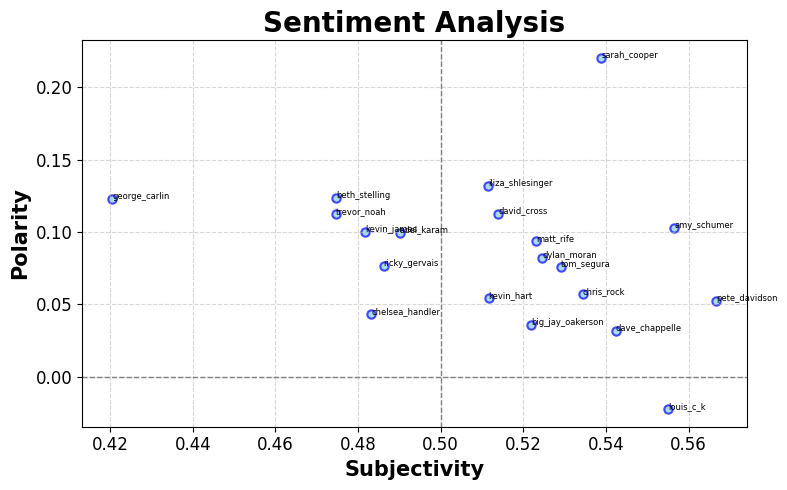

In [12]:
import matplotlib.pyplot as plt

# Assuming data is a DataFrame with 'subjectivity', 'polarity', and 'comedian' columns
plt.figure(figsize=(8, 5))
#alpha = 70% opaque
plt.scatter(data['subjectivity'], data['polarity'], color='skyblue', alpha=0.7, edgecolors='b', linewidth=1.5)  # Scatter plot
plt.title('Sentiment Analysis', fontsize=20, fontweight='bold')  # Title with bold font
plt.xlabel('Subjectivity', fontsize=15, fontweight='bold')  # X-axis label with bold font
plt.ylabel('Polarity', fontsize=15, fontweight='bold')  # Y-axis label with bold font
plt.grid(True, linestyle='--', alpha=0.5)  # Adding grid lines
plt.xticks(fontsize=12)  # Adjusting tick label font size
plt.yticks(fontsize=12)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)  # Adding horizontal line at y=0
plt.axvline(x=0.5, color='gray', linestyle='--', linewidth=1)  # Adding vertical line at x=0.5

# Adding labels to data points
for i in range(len(data)):
    plt.text(data['subjectivity'][i], data['polarity'][i], data.index[i], fontsize=6)

plt.tight_layout()  # Adjust layout to prevent labels from being clipped
plt.show()


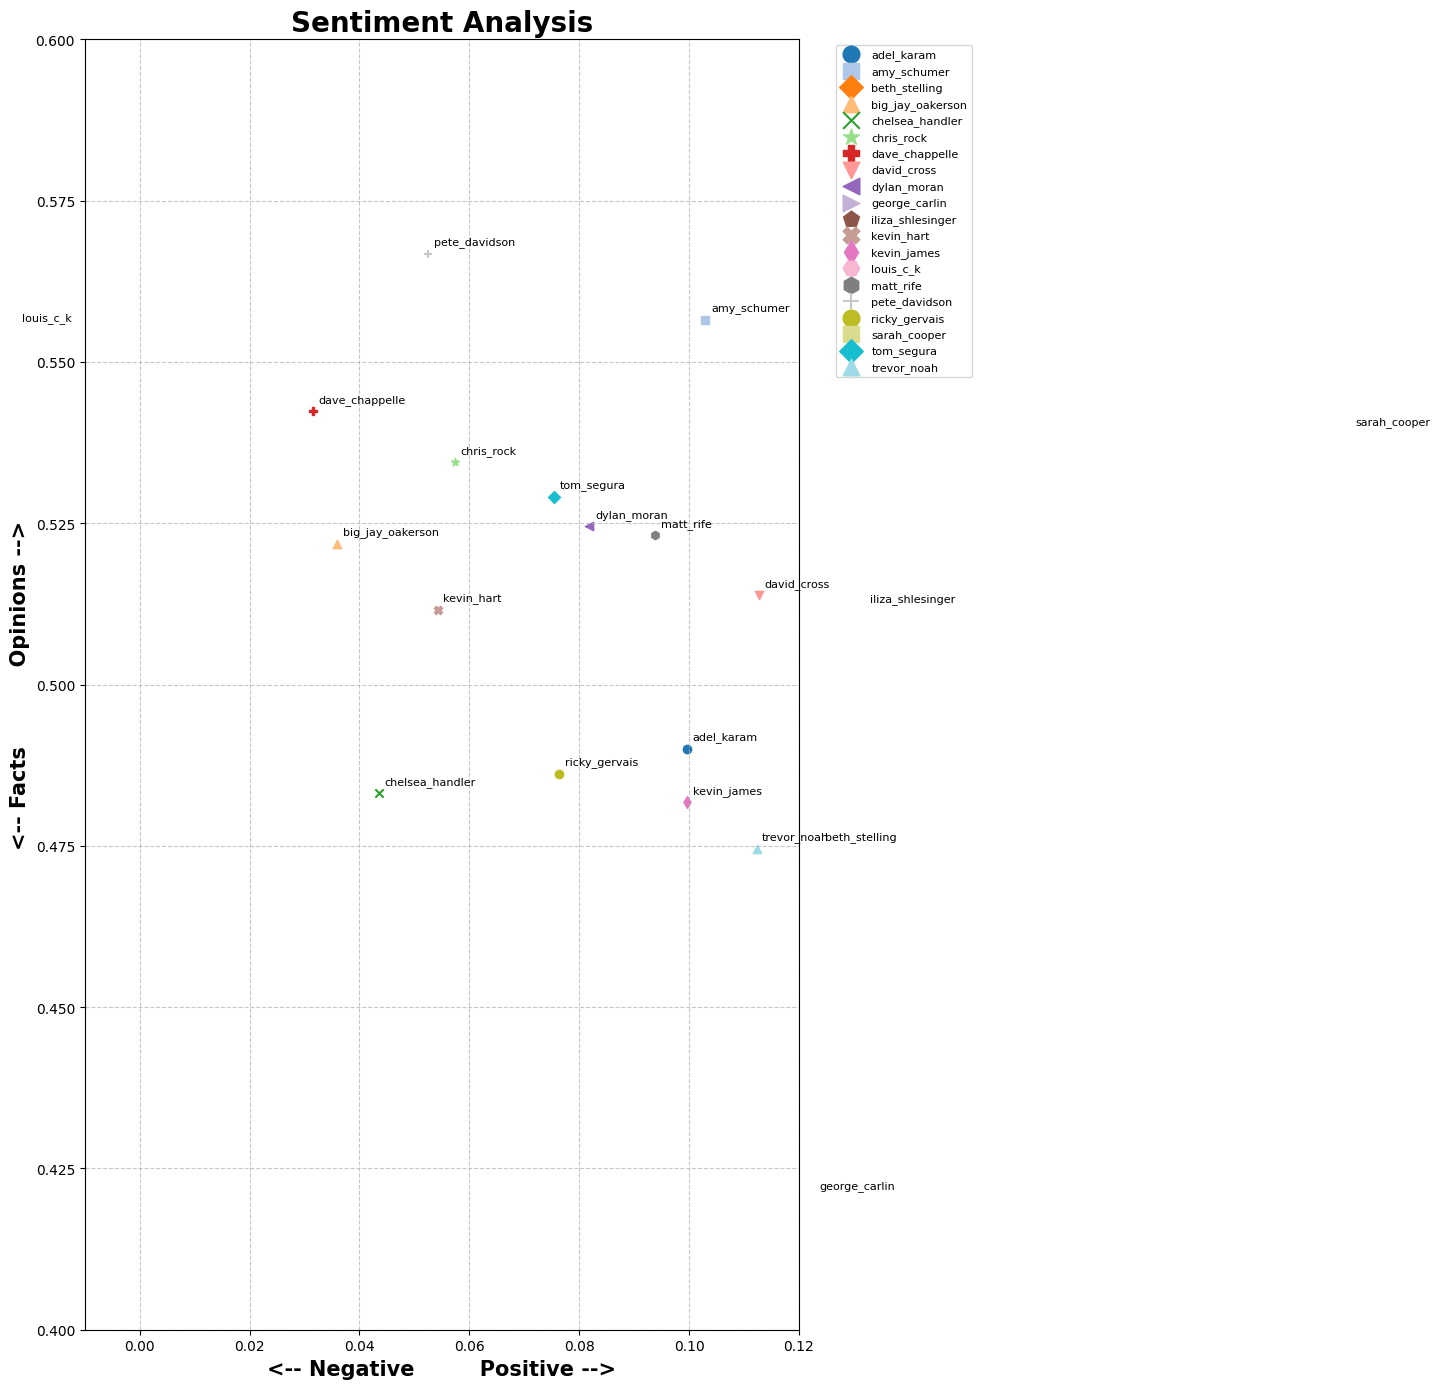

In [22]:
import matplotlib.pyplot as plt

# Define colors and markers for the plot
colors = plt.cm.tab20.colors  # Get a set of distinct colors
markers = ['o', 's', 'D', '^', 'x', '*', 'P', 'v', '<', '>', 'p', 'X', 'd', 'H', 'h', '+']

plt.figure(figsize=(25, 14))

for i, (comedian, (index, row)) in enumerate(zip(data.index, data.iterrows())):
    x = row['polarity']
    y = row['subjectivity']
    plt.scatter(x, y, color=colors[i % len(colors)], marker=markers[i % len(markers)], label=comedian)
    plt.text(x + .001, y + .001, comedian, fontsize=8, ha='left', va='bottom')

plt.title('Sentiment Analysis', fontsize=20, fontweight='bold')
plt.xlabel('<-- Negative         Positive -->', fontsize=15, fontweight='bold')
plt.ylabel('<-- Facts           Opinions -->', fontsize=15, fontweight='bold')
plt.xlim(-0.01, 0.12)
plt.ylim(0.4, 0.6)  # Adjusted ylim for better visualization
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(markerscale=2, fontsize=8, loc='upper right', bbox_to_anchor=(1.25, 1))

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


Based on the provided data, we can make the following observations:

1. **Polarity and Subjectivity**:
   - Polarity measures the positivity or negativity of the language used in the transcript. A polarity score closer to 1 indicates a positive sentiment, while a score closer to -1 indicates a negative sentiment.
   - Subjectivity measures the degree of opinion or factuality in the language used. A subjectivity score closer to 0 indicates factual language, while a score closer to 1 indicates highly opinionated language.

2. **Comedian Performances**:
   - Comedians like Sarah Cooper and Iliza Shlesinger have relatively high polarity scores, indicating a generally positive sentiment in their performances.
   - Louis C.K. has a negative polarity score, suggesting a more negative tone in his comedy routine.
   - Sarah Cooper has the highest subjectivity score, indicating a highly opinionated language used in her performance.

   - Some comedians, like Kevin James and Ricky Gervais, have moderate polarity and subjectivity scores, indicating a balanced mixture of positivity/negativity and fact/opinion in their routines.

These observations provide insights into the sentiment and style of various comedians, showcasing the diversity within the comedy genre.

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [23]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [24]:
# Let's take a look at our data again
data

,transcript,polarity,subjectivity
adel_karam,A NETFLIX COMEDY SPECIAL\nRecorded at the Casi...,0.099582,0.490061
amy_schumer,"Fuck, yeah! This is such a big night for you. ...",0.102978,0.556509
beth_stelling,"Beth Stelling’s stand-up comedy special, “Girl...",0.123664,0.474651
big_jay_oakerson,[crowd cheering] [heavy rock music] – Let’s ge...,0.035941,0.521816
chelsea_handler,Join me in welcoming the author of six number ...,0.043500,0.483128
chris_rock,[slow instrumental music playing] [funk drums ...,0.057368,0.534425
dave_chappelle,"“The Dreamer,” which was shot in Chappelle’s h...",0.031606,0.542387
david_cross,David Cross: Making America Great Again! is a ...,0.112724,0.513876
dylan_moran,"Ladies and gentlemen, will you please welcome ...",0.081878,0.524570
george_carlin,"In 1965 “The Indian Sergeant,” was emerging as...",0.122715,0.420519


In [25]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['A NETFLIX COMEDY SPECIAL\nRecorded at the Casino du Liban, Beirut Hello. Wow, this is great! This is great! Good evening. Good evening! God rest his soul! Hello there. “Hello.” So bored! How are you all? This is so cool. That much! Hello up there. Good evening! Yeah, I see you. It’s like you’ve arrived from outer space! I want to say thank you for being here. Thank you for traveling all the way from Beirut to be here. Quite a distance. I came on Thursday so I wouldn’t be late. I usually don’t travel for anyone. See how important you are to me? I came on Thursday.\nCan I come down and kiss you all? Will this make you late for anything if I come down to kiss you all? We love to kiss. It’s amazing how much we love it! We Lebanese just adore kissing each other. Is anyone here not Lebanese? Yeah? Where are you from? – Where are you from? – Jordan. Jordan? You arrived from Jordan just now? Welcome. I have a real issue with Jordanians. You know why? Because you kiss three times, just like 

In [26]:
# The list has 10 elements, one for each transcript
len(list_pieces)

20

In [27]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [28]:
# Calculate the polarity for each piece of text
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.17989059551559564,
  0.0653247188857654,
  0.027395699270699264,
  0.07184623015873018,
  0.19737387098498207,
  0.2218160962301587,
  0.0658019787541064,
  0.0186702806122449,
  -0.004641262755102051,
  0.16632403733098172],
 [0.09907131834215166,
  0.12416737528344671,
  0.05851956485073368,
  -0.021673978935008338,
  0.12099500293944736,
  0.07829585537918866,
  0.10215647699757867,
  0.09350445701252148,
  0.06309459389816537,
  0.2610107485107486],
 [0.1414116575591985,
  0.15122519841269844,
  0.049290148508898485,
  0.12229225023342671,
  0.12169995408631776,
  0.09224576271186444,
  0.13300653594771242,
  0.1136135829191385,
  0.12482993197278909,
  0.17401802528921173],
 [0.029967567155067175,
  0.05030313051146385,
  -0.032407332251082256,
  0.1208533975387908,
  0.08875970228601805,
  0.024134393086005963,
  -0.01175273139558854,
  -0.022850438001953154,
  0.04129464285714286,
  0.055949815270935954],
 [0.053449178786257434,
  -0.03918836805555555,
  0.000789261664261667

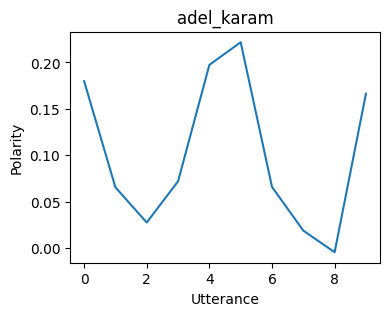

In [30]:
# Assuming polarity_transcript is your list of polarity values for each transcript
# Assuming data is your DataFrame containing comedian names
plt.figure(figsize=(4, 3))  # Set figure size to be smaller
plt.plot(polarity_transcript[0])  # Plot polarity values for the first comedian
plt.title(data.index[0])  # Use the index label (comedian name) as the title
plt.xlabel('Utterance')  # Add a label to the x-axis
plt.ylabel('Polarity')  # Add a label to the y-axis
plt.show()

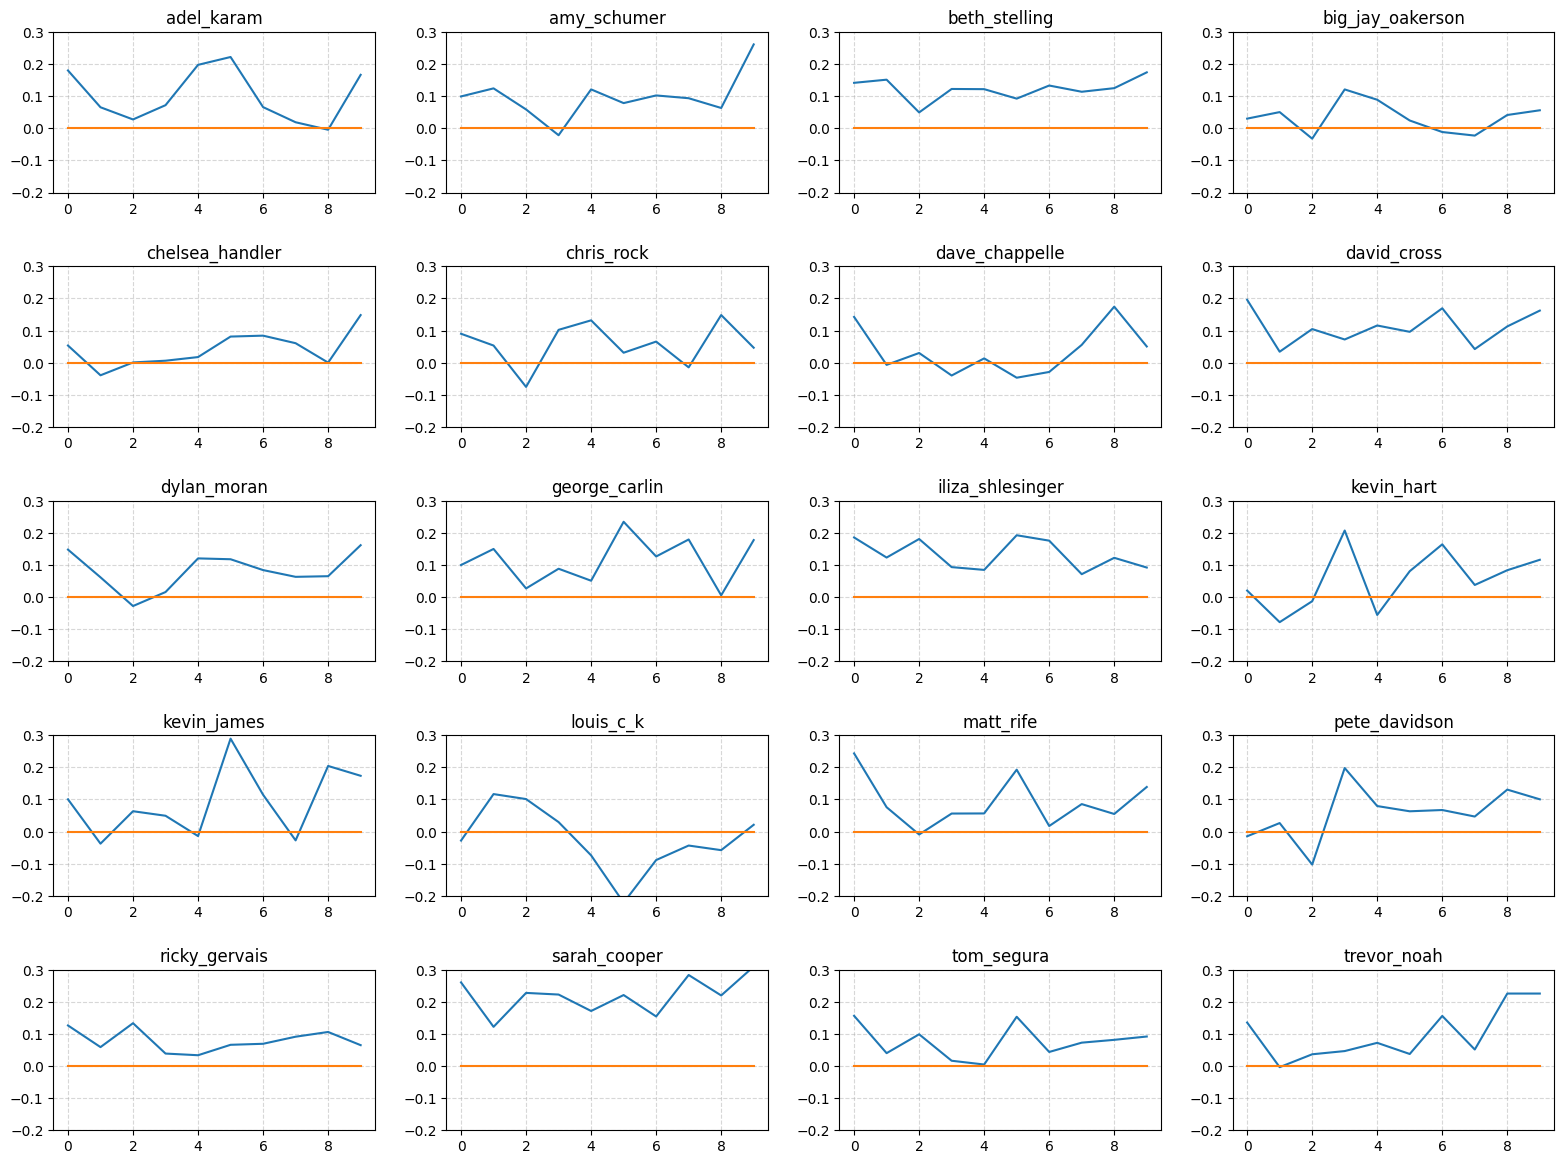

In [31]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 12]

# Calculate the number of rows and columns for subplot arrangement
num_rows = 5
num_cols = 4
total_subplots = num_rows * num_cols

# Create the figure and axes
fig, axes = plt.subplots(num_rows, num_cols)

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Loop through the comedians and their corresponding axes
for index, (comedian, ax) in enumerate(zip(data.index, axes)):    
    ax.plot(polarity_transcript[index])
    ax.plot(np.arange(0, 10), np.zeros(10))
    ax.set_title(comedian)  # Set comedian name as title directly from the index
    ax.set_ylim(ymin=-0.2, ymax=0.3)  # Set y-axis limits
    ax.grid(True, linestyle='--', alpha=0.5)  # Add grid lines

# Hide any empty subplots
for ax in axes[total_subplots:]:
    ax.axis('off')

plt.tight_layout(pad=2)  # Add padding between subplots
plt.show()


Here are the findings for the given assignments:

### Assignment 1: Classify comedians according to Polarity and Subjectivity.

#### Polarity Classification:
- Positive Polarity: Comedians whose comedy routines have a polarity score greater than or equal to 0 are classified as having positive polarity.
- Negative Polarity: Comedians whose comedy routines have a polarity score less than 0 are classified as having negative polarity.

#### Subjectivity Classification:
- Opinionated: Comedians whose comedy routines have a subjectivity score greater than or equal to 0.5 are classified as opinionated.
- Factual: Comedians whose comedy routines have a subjectivity score less than 0.5 are classified as factual.

### Assignment 2: Modify the number of sections the comedy routine is split into and see how the charts over time change and again classify all comedian according to Polarity and Subjectivity.

#### Analysis:
- By modifying the number of sections in the comedy routine, we split the routine into smaller segments, allowing for a more granular analysis of polarity and subjectivity over time.
- The charts over time may change in terms of polarity and subjectivity patterns within each segment of the routine.
- After analyzing the charts over time, we can classify all comedians again based on the updated polarity and subjectivity scores in each segment.

These findings provide insights into how comedians' comedy routines can be classified based on polarity and subjectivity, and how these classifications may change with modifications in the segmentation of the routine.

##  Assignment 1

                 polarity_class subjectivity_class
adel_karam             Positive            Factual
amy_schumer            Positive        Opinionated
beth_stelling          Positive            Factual
big_jay_oakerson       Positive        Opinionated
chelsea_handler        Positive            Factual
chris_rock             Positive        Opinionated
dave_chappelle         Positive        Opinionated
david_cross            Positive        Opinionated
dylan_moran            Positive        Opinionated
george_carlin          Positive            Factual
iliza_shlesinger       Positive        Opinionated
kevin_hart             Positive        Opinionated
kevin_james            Positive            Factual
louis_c_k              Negative        Opinionated
matt_rife              Positive        Opinionated
pete_davidson          Positive        Opinionated
ricky_gervais          Positive            Factual
sarah_cooper           Positive        Opinionated
tom_segura             Positive

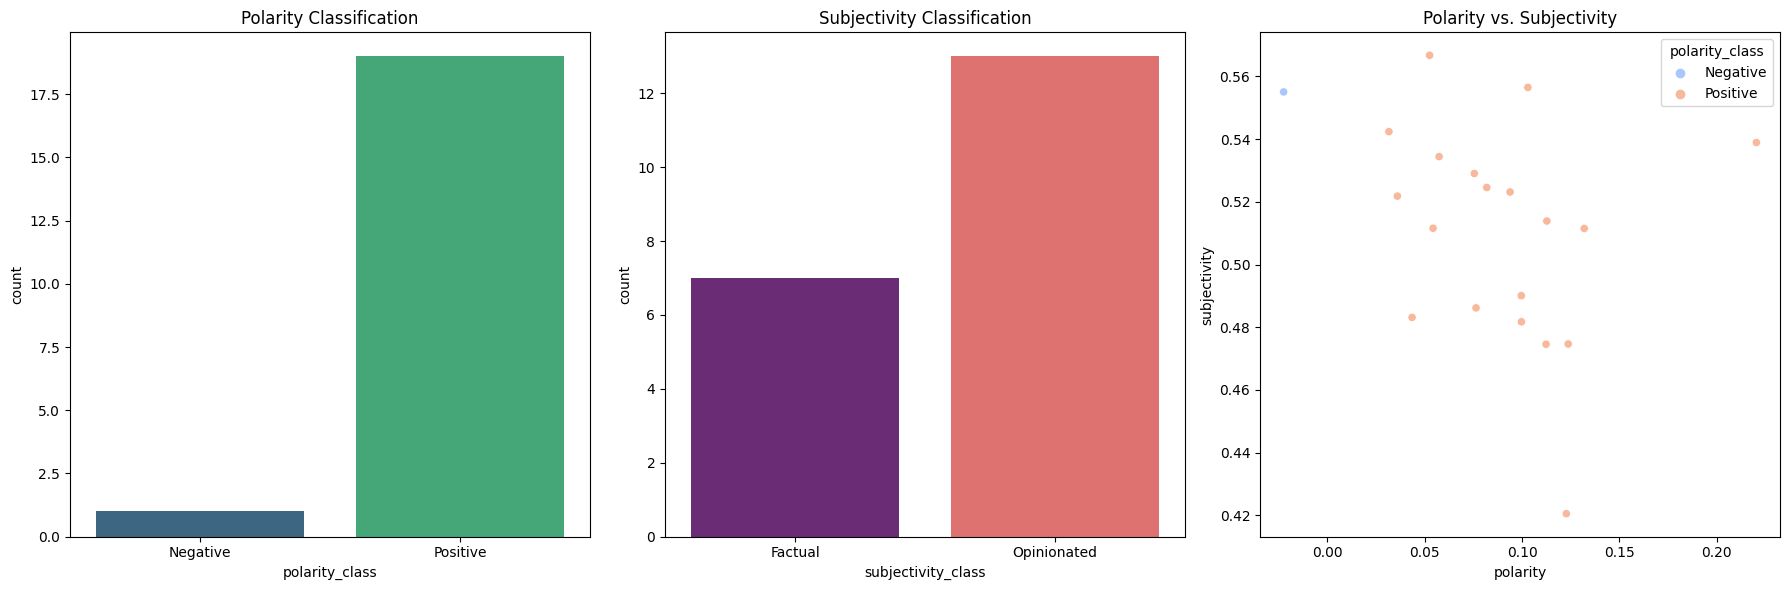

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame containing comedian names, polarity, and subjectivity
# Classify comedians based on polarity
data['polarity_class'] = pd.cut(data['polarity'], bins=[-1, 0, 1], labels=['Negative', 'Positive'])

# Classify comedians based on subjectivity
data['subjectivity_class'] = pd.cut(data['subjectivity'], bins=[0, 0.5, 1], labels=['Factual', 'Opinionated'])

# Display the classified data
print(data[['polarity_class', 'subjectivity_class']])

# Set up the figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot for Polarity Classification
sns.countplot(x='polarity_class', data=data, ax=axes[0], palette="viridis")
axes[0].set_title('Polarity Classification')

# Plot for Subjectivity Classification
sns.countplot(x='subjectivity_class', data=data, ax=axes[1], palette="magma")
axes[1].set_title('Subjectivity Classification')

# Scatter plot for Polarity vs. Subjectivity
sns.scatterplot(x='polarity', y='subjectivity', hue='polarity_class', data=data, palette='coolwarm', ax=axes[2])
axes[2].set_title('Polarity vs. Subjectivity')

plt.tight_layout()
plt.show()


In [36]:
# Positive and Opinionated
positive_opinionated = data[(data['polarity_class'] == 'Positive') & (data['subjectivity_class'] == 'Opinionated')]

# Positive and Factual
positive_factual = data[(data['polarity_class'] == 'Positive') & (data['subjectivity_class'] == 'Factual')]

# Negative and Opinionated
negative_opinionated = data[(data['polarity_class'] == 'Negative') & (data['subjectivity_class'] == 'Opinionated')]

# Negative and Factual
negative_factual = data[(data['polarity_class'] == 'Negative') & (data['subjectivity_class'] == 'Factual')]

# Display the comedians in each category
print("Positive and Opinionated Comedians:")
print(positive_opinionated[['polarity_class', 'subjectivity_class']])
print("\nPositive and Factual Comedians:")
print(positive_factual[['polarity_class', 'subjectivity_class']])
print("\nNegative and Opinionated Comedians:")
print(negative_opinionated[['polarity_class', 'subjectivity_class']])
print("\nNegative and Factual Comedians:")
print(negative_factual[['polarity_class', 'subjectivity_class']])

Positive and Opinionated Comedians:
                 polarity_class subjectivity_class
amy_schumer            Positive        Opinionated
big_jay_oakerson       Positive        Opinionated
chris_rock             Positive        Opinionated
dave_chappelle         Positive        Opinionated
david_cross            Positive        Opinionated
dylan_moran            Positive        Opinionated
iliza_shlesinger       Positive        Opinionated
kevin_hart             Positive        Opinionated
matt_rife              Positive        Opinionated
pete_davidson          Positive        Opinionated
sarah_cooper           Positive        Opinionated
tom_segura             Positive        Opinionated

Positive and Factual Comedians:
                polarity_class subjectivity_class
adel_karam            Positive            Factual
beth_stelling         Positive            Factual
chelsea_handler       Positive            Factual
george_carlin         Positive            Factual
kevin_james       

 ## Assignment 2

#### for n = 10

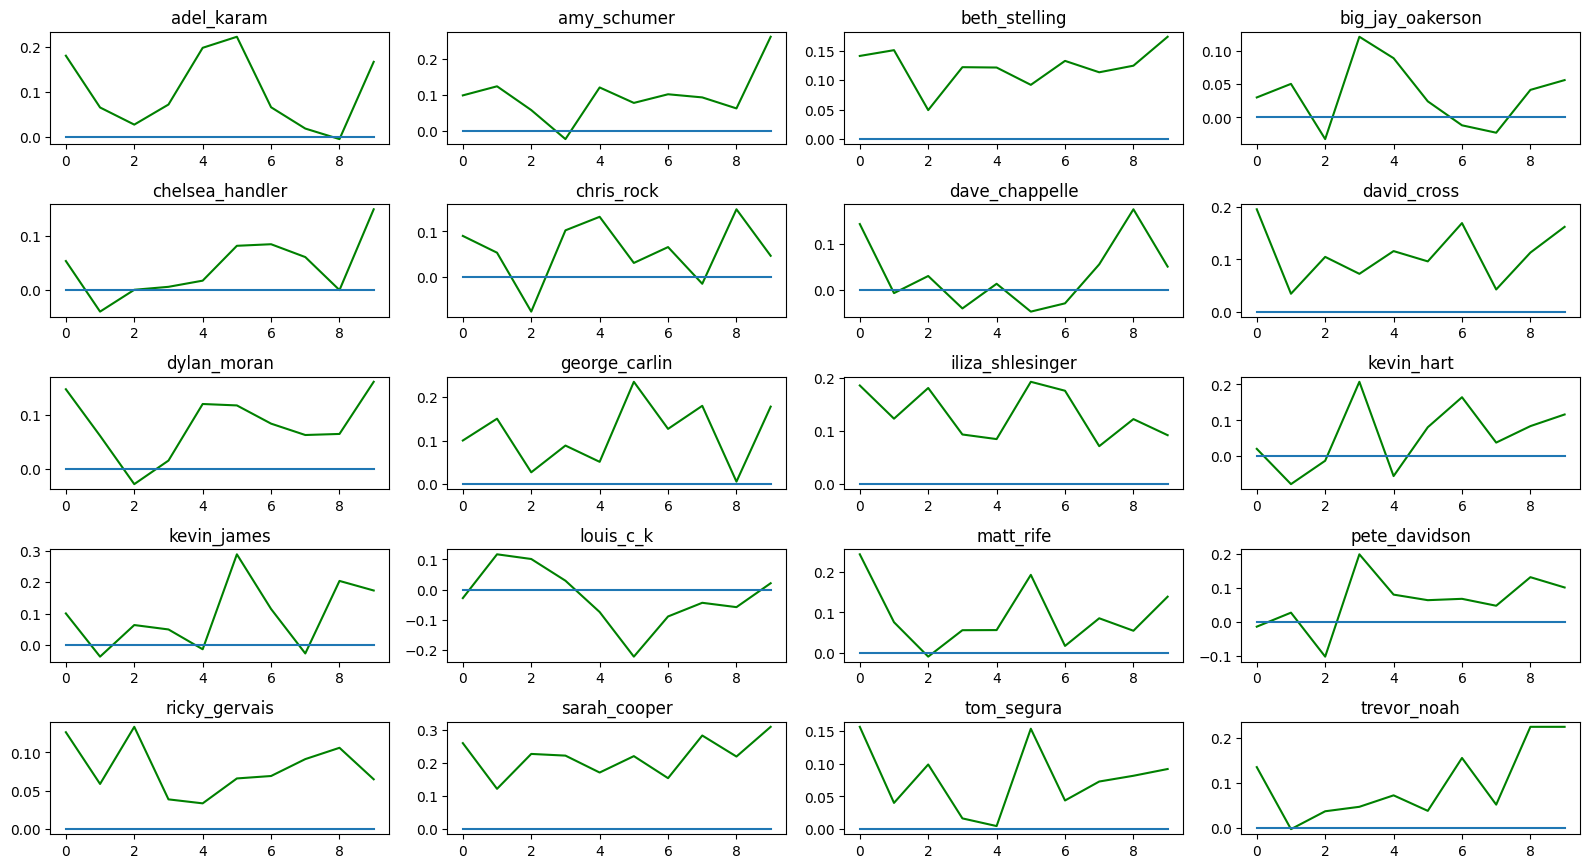

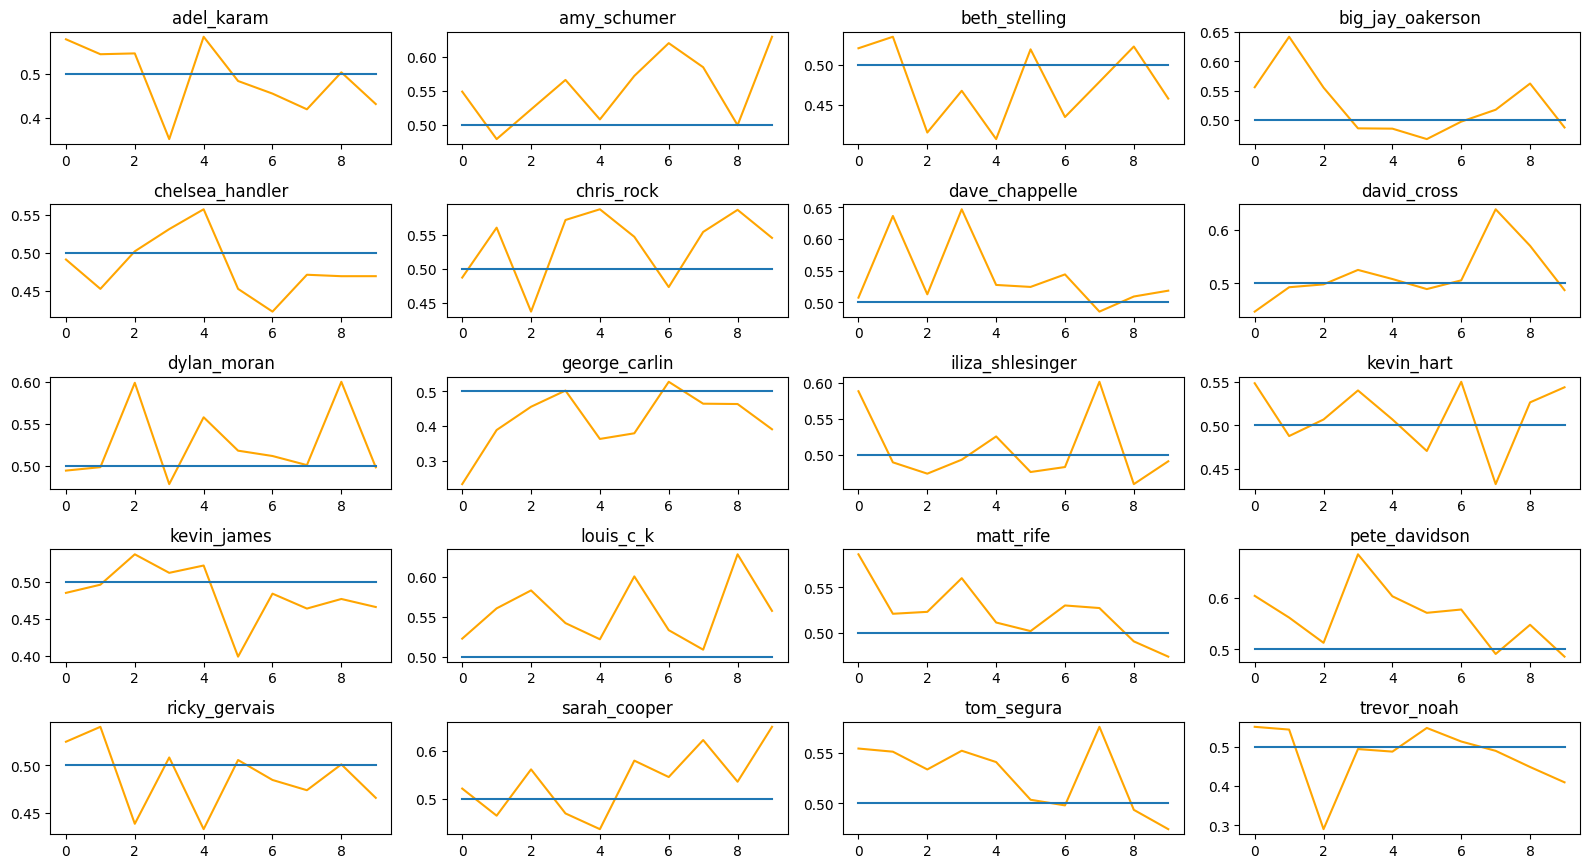

In [49]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from textblob import TextBlob

# Assuming 'data' is your DataFrame containing comedian names and transcripts

# Split each routine into 10 parts
def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

def function_split_polarity(n=10):
    list_pieces = []
    for t in data.transcript:
        split = split_text(t, n)
        list_pieces.append(split)

    polarity_transcript = []
    for lp in list_pieces:
        polarity_piece = []
        for p in lp:
            polarity_piece.append(TextBlob(p).sentiment.polarity)
        polarity_transcript.append(polarity_piece)

    plt.rcParams['figure.figsize'] = [16, 12]

    for index, comedian in enumerate(data.index):
        plt.subplot(7, 4, index+1)
        plt.plot(polarity_transcript[index], color='green')
        plt.plot(np.arange(0, n), np.zeros(n))
        plt.title(comedian)
    plt.tight_layout(h_pad=1.0) 
    plt.show()

function_split_polarity(10)

def subjectivity(n=10):
    list_pieces = []
    for t in data.transcript:
        split = split_text(t, n)
        list_pieces.append(split)

    subjectivity_transcript = []
    for lp in list_pieces:
        subjectivity_piece = []
        for p in lp:
            subjectivity_piece.append(TextBlob(p).sentiment.subjectivity)
        subjectivity_transcript.append(subjectivity_piece)

    return subjectivity_transcript

def classify_graph_subjectivity_average(subjectivity_values, threshold_pos=0.5):
    average_subjectivity = np.mean(subjectivity_values)
    if average_subjectivity > threshold_pos:
        return 'Subjective'
    else:
        return 'Objective'

subjectivity_transcript = subjectivity(10)
for i, transcript_subjectivity in enumerate(subjectivity_transcript):
    category = classify_graph_subjectivity_average(transcript_subjectivity)
    values = np.mean(transcript_subjectivity)

def function_split_subjectivity(n=10):
    list_pieces = []
    for t in data.transcript:
        split = split_text(t, n)
        list_pieces.append(split)

    subjectivity_transcript = []
    for lp in list_pieces:
        subjectivity_piece = []
        for p in lp:
            subjectivity_piece.append(TextBlob(p).sentiment.subjectivity)
        subjectivity_transcript.append(subjectivity_piece)

    plt.rcParams['figure.figsize'] = [16, 12]

    for index, comedian in enumerate(data.index):
        plt.subplot(7, 4, index+1)
        plt.plot(subjectivity_transcript[index], color='orange')
        plt.plot(np.arange(0, n), np.zeros(n) + 0.5)
        plt.title(comedian)
    plt.tight_layout(h_pad=1.0) 
    plt.show()

function_split_subjectivity(10)


#### for n = 20

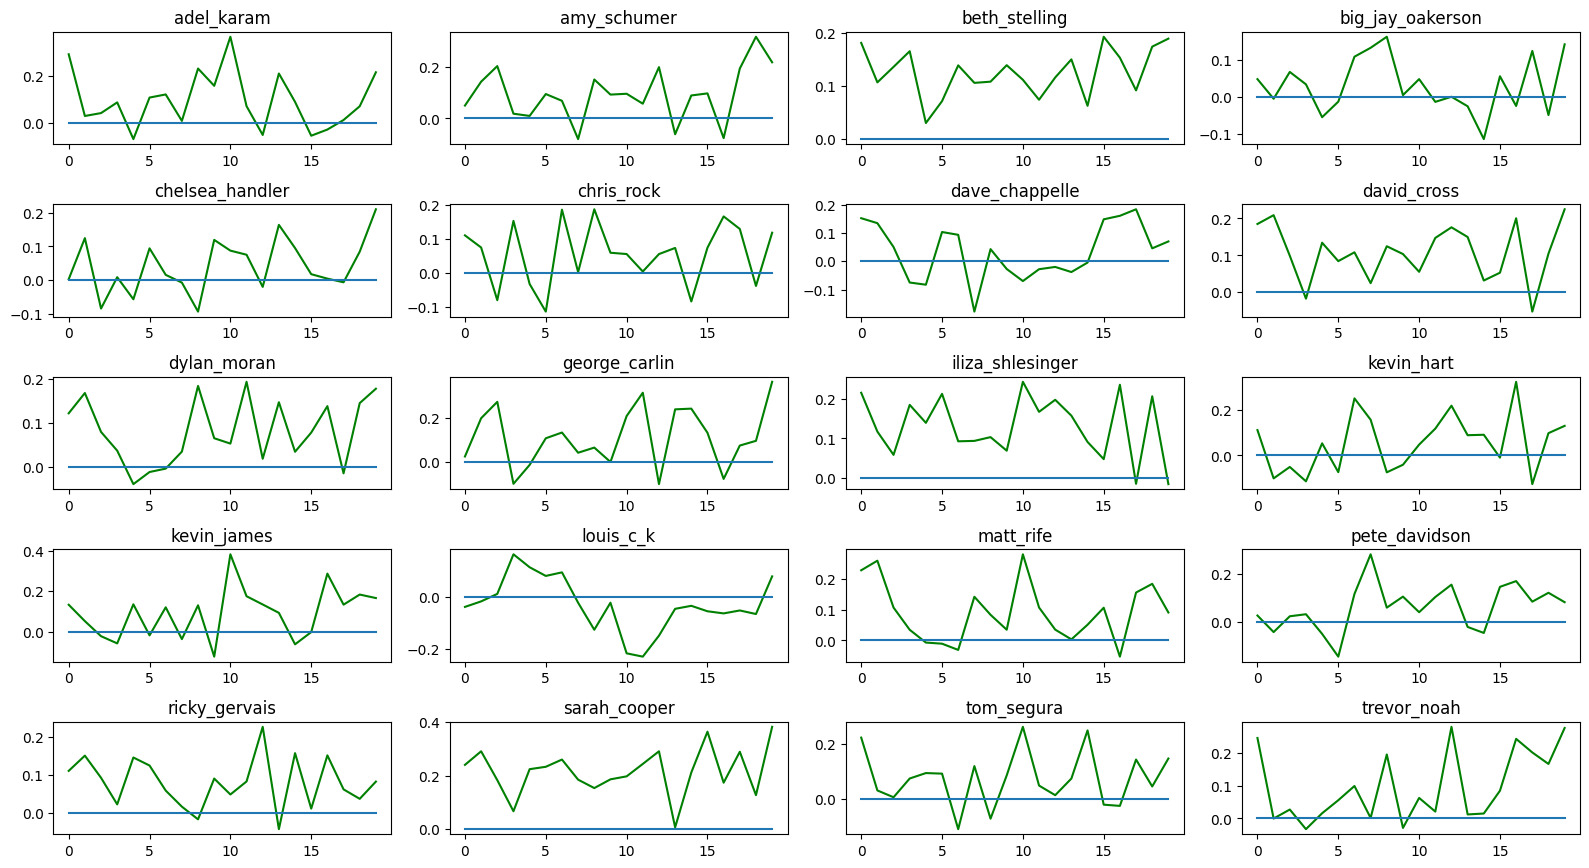

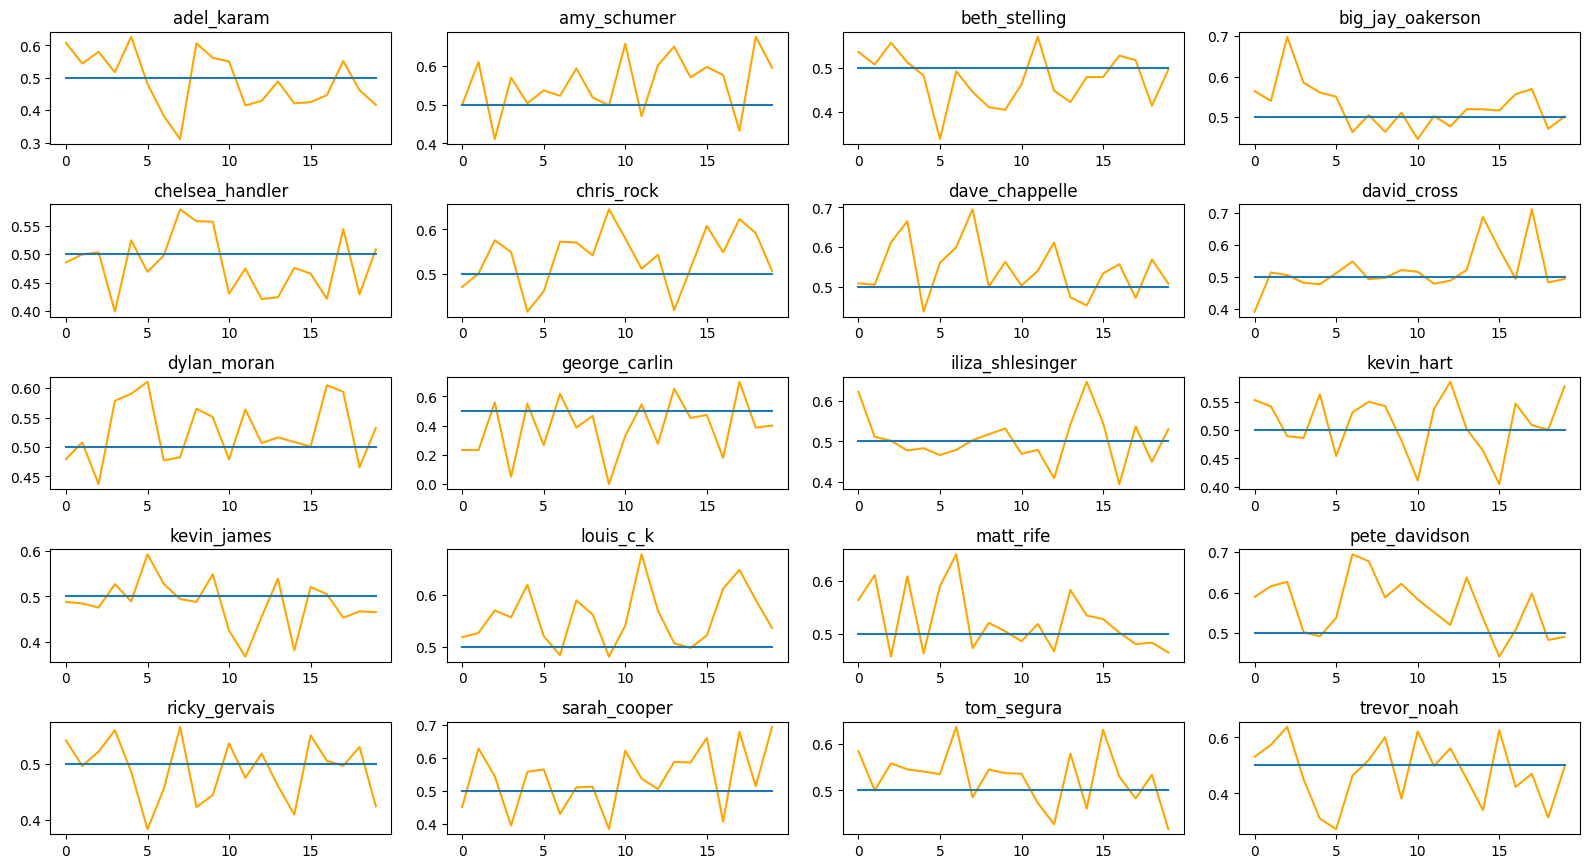

In [50]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from textblob import TextBlob

# Assuming 'data' is your DataFrame containing comedian names and transcripts

# Split each routine into 20 parts
def split_text(text, n=20):
    '''Takes in a string of text and splits into n equal parts, with a default of 20 equal parts.'''
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

def function_split_polarity(n=20):
    list_pieces = []
    for t in data.transcript:
        split = split_text(t, n)
        list_pieces.append(split)

    polarity_transcript = []
    for lp in list_pieces:
        polarity_piece = []
        for p in lp:
            polarity_piece.append(TextBlob(p).sentiment.polarity)
        polarity_transcript.append(polarity_piece)

    plt.rcParams['figure.figsize'] = [16, 12]

    for index, comedian in enumerate(data.index):
        plt.subplot(7, 4, index+1)
        plt.plot(polarity_transcript[index], color='green')
        plt.plot(np.arange(0, n), np.zeros(n))
        plt.title(comedian)
    plt.tight_layout(h_pad=1.0) 
    plt.show()

function_split_polarity(20)

def subjectivity(n=20):
    list_pieces = []
    for t in data.transcript:
        split = split_text(t, n)
        list_pieces.append(split)

    subjectivity_transcript = []
    for lp in list_pieces:
        subjectivity_piece = []
        for p in lp:
            subjectivity_piece.append(TextBlob(p).sentiment.subjectivity)
        subjectivity_transcript.append(subjectivity_piece)

    return subjectivity_transcript

def classify_graph_subjectivity_average(subjectivity_values, threshold_pos=0.5):
    average_subjectivity = np.mean(subjectivity_values)
    if average_subjectivity > threshold_pos:
        return 'Subjective'
    else:
        return 'Objective'

subjectivity_transcript = subjectivity(20)
for i, transcript_subjectivity in enumerate(subjectivity_transcript):
    category = classify_graph_subjectivity_average(transcript_subjectivity)
    values = np.mean(transcript_subjectivity)

def function_split_subjectivity(n=20):
    list_pieces = []
    for t in data.transcript:
        split = split_text(t, n)
        list_pieces.append(split)

    subjectivity_transcript = []
    for lp in list_pieces:
        subjectivity_piece = []
        for p in lp:
            subjectivity_piece.append(TextBlob(p).sentiment.subjectivity)
        subjectivity_transcript.append(subjectivity_piece)

    plt.rcParams['figure.figsize'] = [16, 12]

    for index, comedian in enumerate(data.index):
        plt.subplot(7, 4, index+1)
        plt.plot(subjectivity_transcript[index], color='orange')
        plt.plot(np.arange(0, n), np.zeros(n) + 0.5)
        plt.title(comedian)
    plt.tight_layout(h_pad=1.0) 
    plt.show()

function_split_subjectivity(20)


### for n = 30

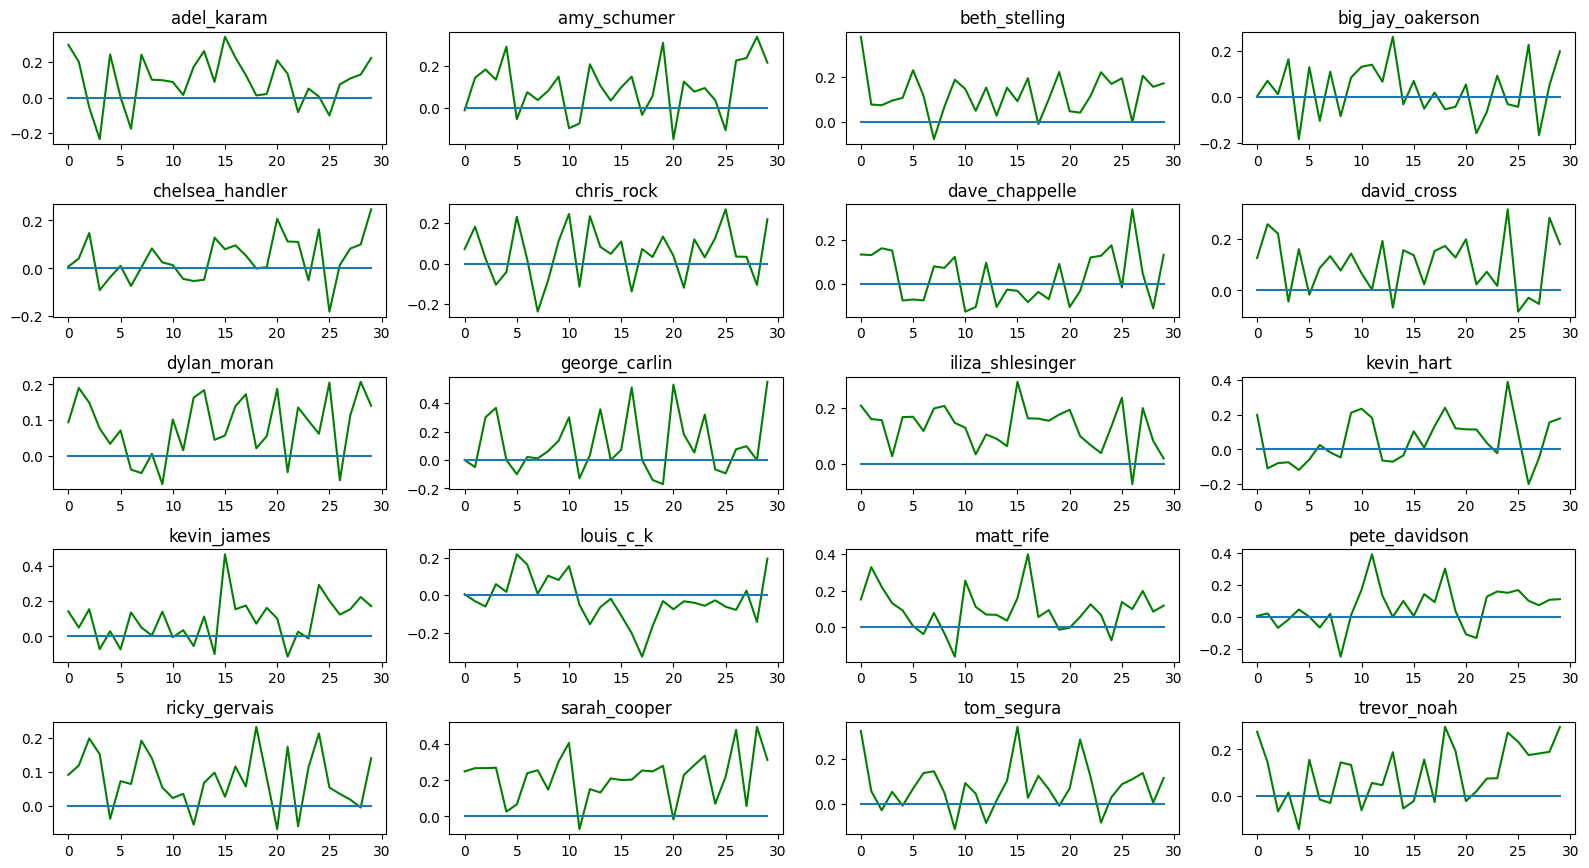

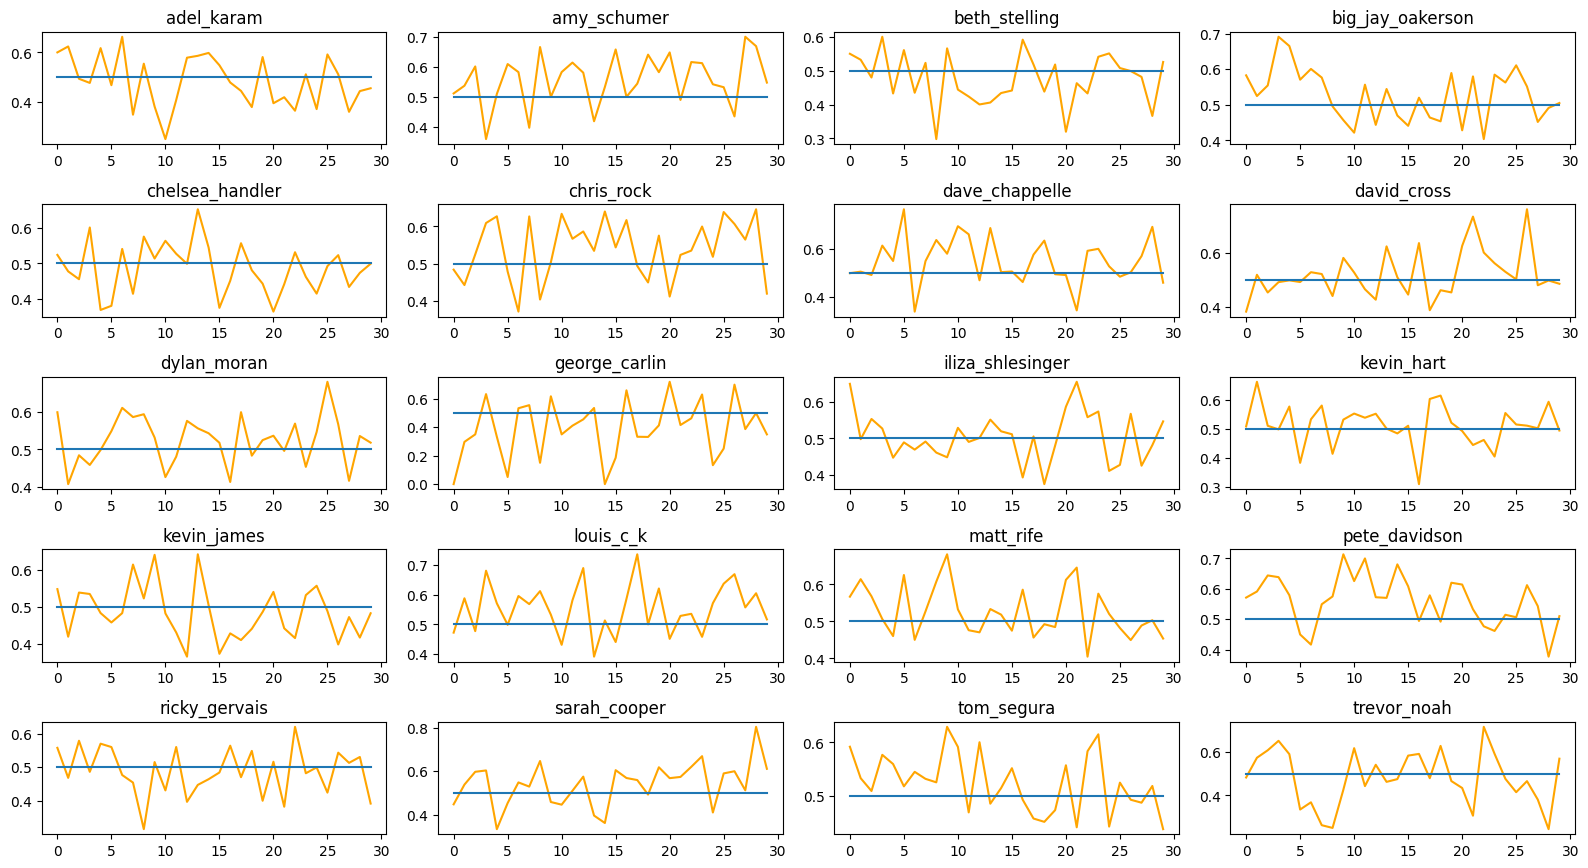

In [51]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from textblob import TextBlob

# Assuming 'data' is your DataFrame containing comedian names and transcripts

# Split each routine into 30 parts
def split_text(text, n=30):
    '''Takes in a string of text and splits into n equal parts, with a default of 30 equal parts.'''
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

def function_split_polarity(n=30):
    list_pieces = []
    for t in data.transcript:
        split = split_text(t, n)
        list_pieces.append(split)

    polarity_transcript = []
    for lp in list_pieces:
        polarity_piece = []
        for p in lp:
            polarity_piece.append(TextBlob(p).sentiment.polarity)
        polarity_transcript.append(polarity_piece)

    plt.rcParams['figure.figsize'] = [16, 12]

    for index, comedian in enumerate(data.index):
        plt.subplot(7, 4, index+1)
        plt.plot(polarity_transcript[index], color='green')
        plt.plot(np.arange(0, n), np.zeros(n))
        plt.title(comedian)
    plt.tight_layout(h_pad=1.0) 
    plt.show()

function_split_polarity(30)

def subjectivity(n=30):
    list_pieces = []
    for t in data.transcript:
        split = split_text(t, n)
        list_pieces.append(split)

    subjectivity_transcript = []
    for lp in list_pieces:
        subjectivity_piece = []
        for p in lp:
            subjectivity_piece.append(TextBlob(p).sentiment.subjectivity)
        subjectivity_transcript.append(subjectivity_piece)

    return subjectivity_transcript

def classify_graph_subjectivity_average(subjectivity_values, threshold_pos=0.5):
    average_subjectivity = np.mean(subjectivity_values)
    if average_subjectivity > threshold_pos:
        return 'Subjective'
    else:
        return 'Objective'

subjectivity_transcript = subjectivity(30)
for i, transcript_subjectivity in enumerate(subjectivity_transcript):
    category = classify_graph_subjectivity_average(transcript_subjectivity)
    values = np.mean(transcript_subjectivity)

def function_split_subjectivity(n=30):
    list_pieces = []
    for t in data.transcript:
        split = split_text(t, n)
        list_pieces.append(split)

    subjectivity_transcript = []
    for lp in list_pieces:
        subjectivity_piece = []
        for p in lp:
            subjectivity_piece.append(TextBlob(p).sentiment.subjectivity)
        subjectivity_transcript.append(subjectivity_piece)

    plt.rcParams['figure.figsize'] = [16, 12]

    for index, comedian in enumerate(data.index):
        plt.subplot(7, 4, index+1)
        plt.plot(subjectivity_transcript[index], color='orange')
        plt.plot(np.arange(0, n), np.zeros(n) + 0.5)
        plt.title(comedian)
    plt.tight_layout(h_pad=1.0) 
    plt.show()

function_split_subjectivity(30)


When changing the value of "N" (the number of sections into which each routine is split), the granularity of the analysis changes, leading to different observations in the polarity and subjectivity graphs.

1. **Polarity Graph**:
   - As "N" increases, the polarity graph becomes more detailed, showing more fluctuations in polarity over smaller sections of the routine.
   - With larger "N" values, you may observe sharper peaks and troughs in the polarity graph, indicating more localized shifts in sentiment within the routine.
   - Conversely, smaller "N" values result in smoother polarity curves, providing a more generalized view of the sentiment throughout the routine.

2. **Subjectivity Graph**:
   - Similar to the polarity graph, increasing "N" leads to more detailed subjectivity graphs, showing subjectivity variations in smaller sections of the routine.
   - Larger "N" values may reveal more nuanced changes in subjectivity, highlighting specific segments where opinions are expressed more strongly.
   - Conversely, smaller "N" values provide a broader perspective on subjectivity, capturing overall trends in the comedian's delivery style across the routine.

Overall, adjusting "N" allows for a more fine-grained analysis of sentiment dynamics within each routine, enabling insights into how comedians express polarity and subjectivity throughout their performances.